In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import random
import scipy.stats as scipy
import seaborn as sns

In [14]:
csv = pd.read_csv('../../hr/HR.csv')

In [15]:
csv.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


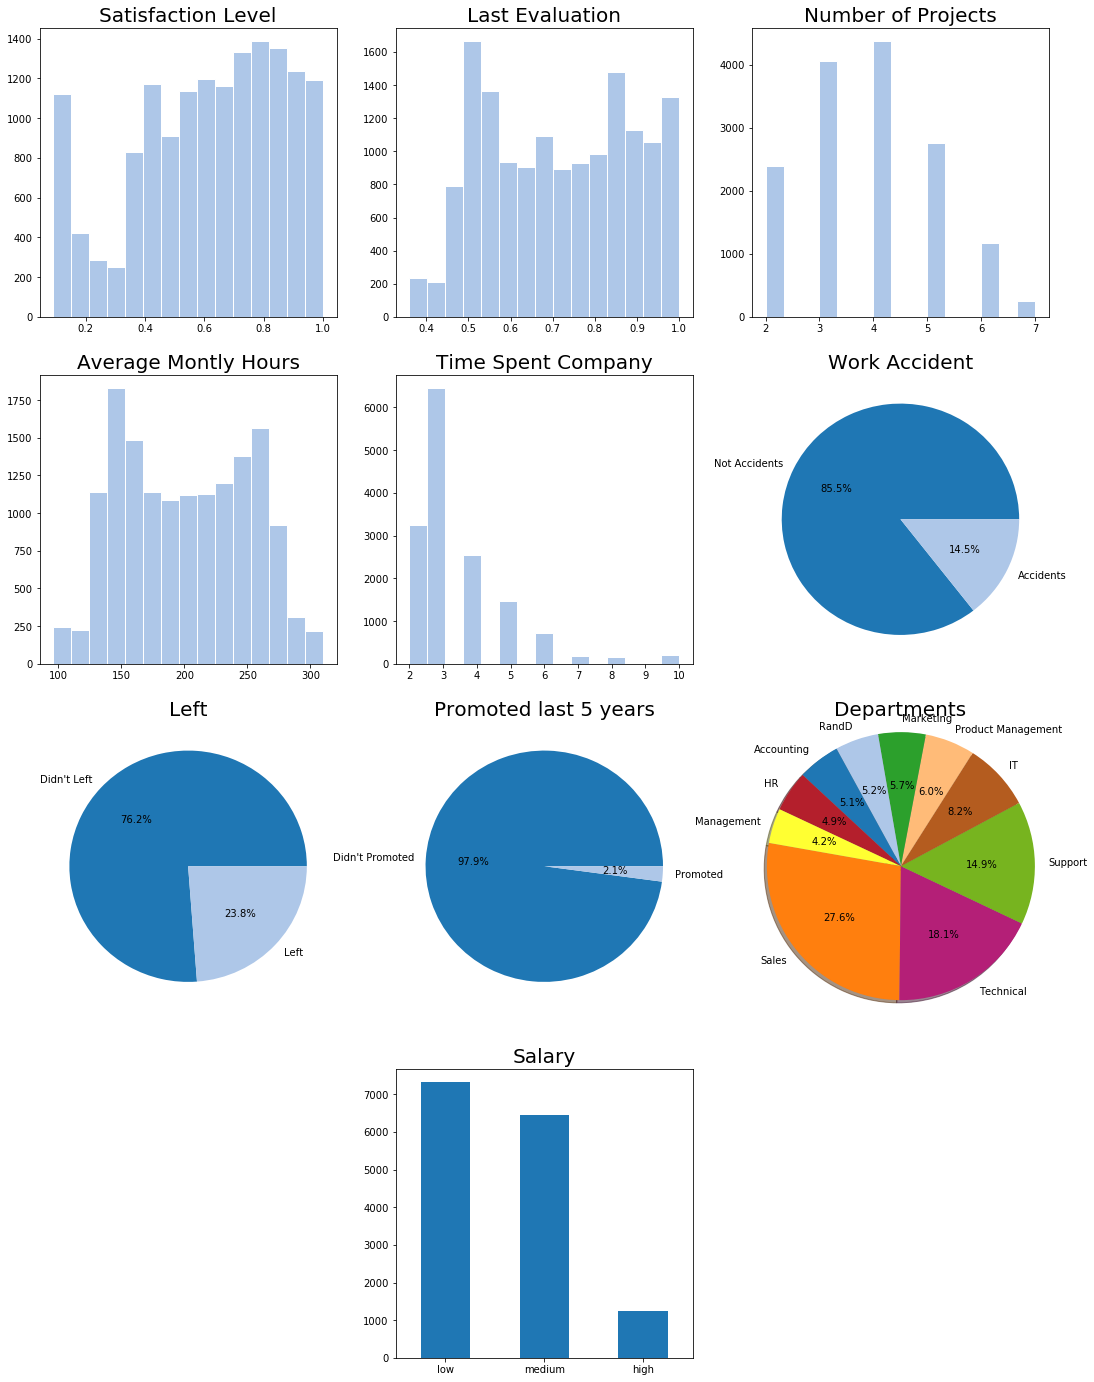

In [16]:
bar_chart1 = plt.figure(figsize=(50,50))
fig_dims = (8, 8)

plt.subplot2grid(fig_dims, (0, 0))
histo1 = plt.hist(csv['satisfaction_level'], 15, color = '#aec7e8', ec='#FFFFFF')
plt.title('Satisfaction Level', size = 20)

plt.subplot2grid(fig_dims, (0, 1))
histo1 = plt.hist(csv['last_evaluation'], 15, color = '#aec7e8', ec='#FFFFFF')
plt.title('Last Evaluation', size = 20)

plt.subplot2grid(fig_dims, (0, 2))
histo1 = plt.hist(csv['number_project'], 15, color = '#aec7e8', ec='#FFFFFF')
plt.title('Number of Projects', size = 20)

plt.subplot2grid(fig_dims, (1, 0))
histo1 = plt.hist(csv['average_montly_hours'], 15, color = '#aec7e8', ec='#FFFFFF')
plt.title('Average Montly Hours', size = 20)

plt.subplot2grid(fig_dims, (1, 1))
histo1 = plt.hist(csv['time_spend_company'], 15, color = '#aec7e8', ec='#FFFFFF')
plt.title('Time Spent Company', size = 20)

plt.subplot2grid(fig_dims, (1, 2))
labels= 'Not Accidents', 'Accidents'
histo1 = plt.pie(csv['Work_accident'].value_counts(), labels=labels, autopct='%1.1f%%', colors=('#1F77B4','#aec7e8'))
plt.title('Work Accident', size = 20)

plt.subplot2grid(fig_dims, (2, 0))
labels= 'Didn\'t Left', 'Left'
histo1 = plt.pie(csv['left'].value_counts(), labels=labels, autopct='%1.1f%%', colors=('#1F77B4','#aec7e8'))
plt.title('Left', size = 20)

plt.subplot2grid(fig_dims, (2, 1))
labels= 'Didn\'t Promoted', 'Promoted'
histo1 = plt.pie(csv['promotion_last_5years'].value_counts(), labels=labels, autopct='%1.1f%%', colors=('#1F77B4','#aec7e8'))
plt.title('Promoted last 5 years', size = 20)

ax1 = plt.subplot2grid(fig_dims, (2, 2))
labels = 'Sales', 'Technical', 'Support', 'IT', 'Product Management', 'Marketing', 'RandD', 'Accounting', 'HR', 'Management'
sizes = csv['sales'].value_counts()
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
col = ('#FF7F0E','#b41f77', '#77b41f', '#b45c1f','#ffbb78', '#2ca02c', '#aec7e8', '#1F77B4', '#b41f2c', '#ffff32')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=170, colors=col)
ax1.axis('equal') 
plt.title('Departments', size = 20)

plt.subplot2grid(fig_dims, (3, 1))
csv['salary'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Salary', size = 20)

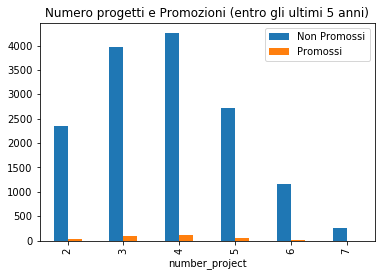

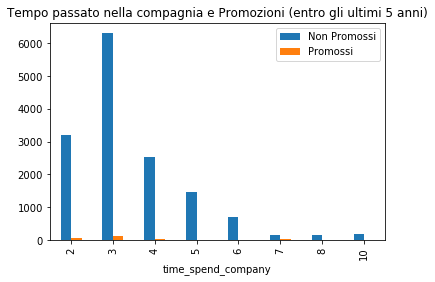

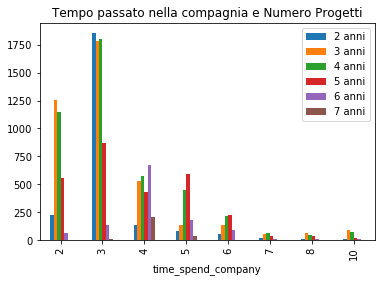

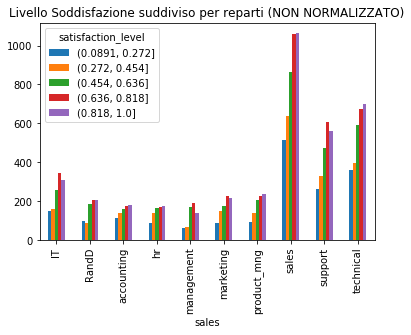

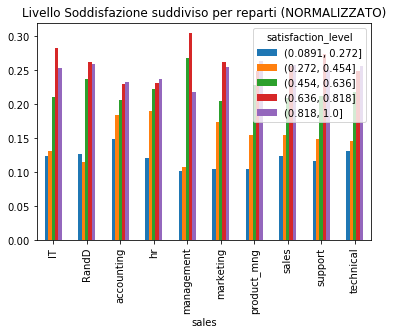

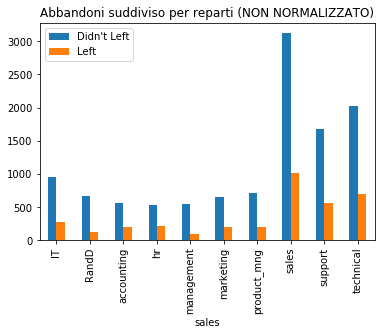

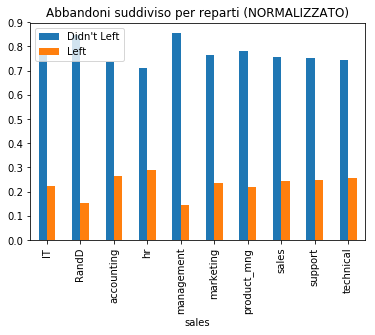

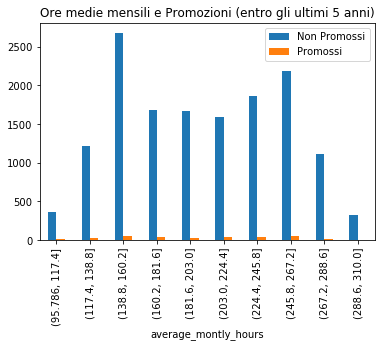

In [17]:


projects_promotions = pd.crosstab(csv['number_project'], csv['promotion_last_5years'])
plot1 = projects_promotions.plot(kind="bar", title='Numero progetti e Promozioni (entro gli ultimi 5 anni)')
plot1.legend(["Non Promossi", "Promossi"])

years_promotions = pd.crosstab(csv['time_spend_company'], csv['promotion_last_5years'])
plot2 = years_promotions.plot(kind="bar", title='Tempo passato nella compagnia e Promozioni (entro gli ultimi 5 anni)')
plot2.legend(["Non Promossi", "Promossi"])

projects_years = pd.crosstab( csv['time_spend_company'], csv['number_project'])
plot3 = projects_years.plot(kind="bar", title='Tempo passato nella compagnia e Numero Progetti')
plot3.legend(["2 anni", "3 anni", "4 anni", "5 anni", "6 anni", "7 anni"])

departments_satistfaction = pd.crosstab(csv['sales'], pd.cut(csv['satisfaction_level'], 5))
plot4 = departments_satistfaction.plot(kind="bar", title='Livello Soddisfazione suddiviso per reparti (NON NORMALIZZATO)')
departments_satistfaction = departments_satistfaction.div(departments_satistfaction.sum(1).astype(float), axis=0)
plot5 = departments_satistfaction.plot(kind="bar", title='Livello Soddisfazione suddiviso per reparti (NORMALIZZATO)')

departments_left = pd.crosstab(csv['sales'], csv['left'])
plot6 = departments_left.plot(kind="bar", title='Abbandoni suddiviso per reparti (NON NORMALIZZATO)')
plot6.legend(["Didn't Left", "Left"])
departments_left = departments_left.div(departments_left.sum(1).astype(float), axis=0)
plot7 = departments_left.plot(kind="bar", title='Abbandoni suddiviso per reparti (NORMALIZZATO)')
plot7.legend(["Didn't Left", "Left"])

montly_hours_promotions = pd.crosstab( pd.cut(csv['average_montly_hours'], 10), csv['promotion_last_5years'])
plot8 = montly_hours_promotions.plot(kind="bar", title='Ore medie mensili e Promozioni (entro gli ultimi 5 anni)')
plot8.legend(["Non Promossi", "Promossi"])

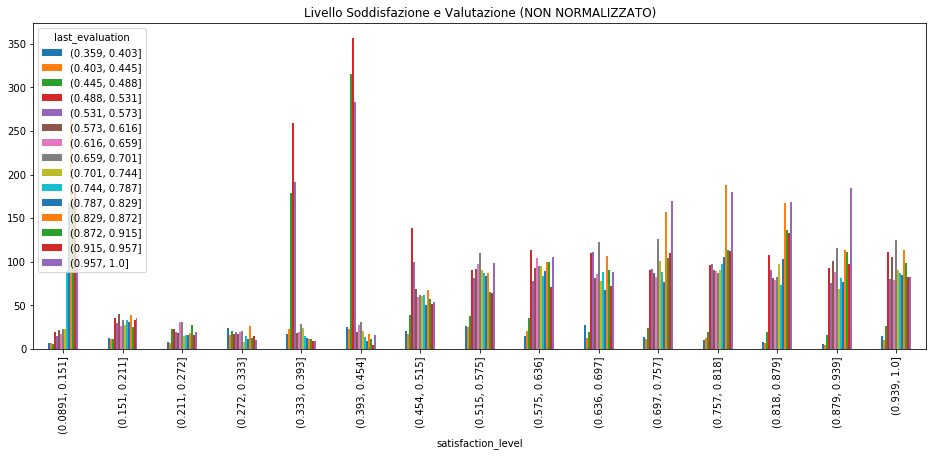

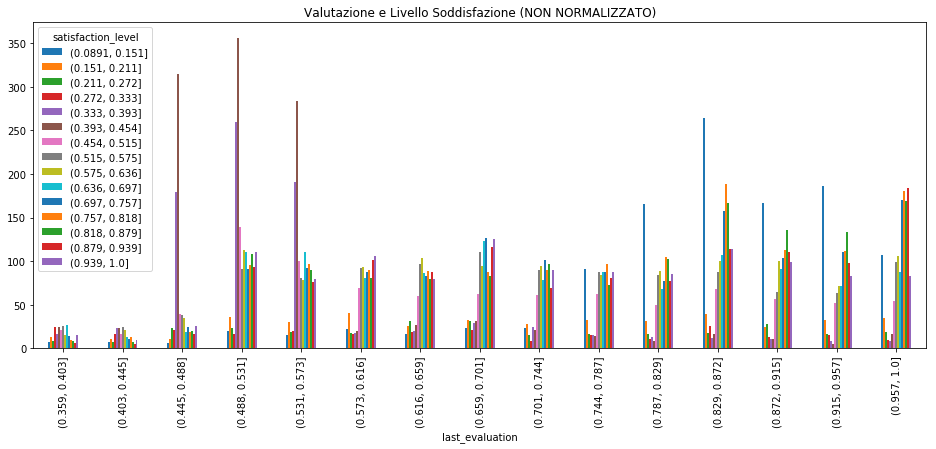

In [18]:
plt.rcParams['figure.figsize'] = (16, 6)
departments_satistfaction = pd.crosstab(pd.cut(csv['satisfaction_level'], 15), pd.cut(csv['last_evaluation'], 15))
plot4 = departments_satistfaction.plot(kind="bar", title='Livello Soddisfazione e Valutazione (NON NORMALIZZATO)')

evaluation_satistfaction = pd.crosstab(pd.cut(csv['last_evaluation'], 15), pd.cut(csv['satisfaction_level'], 15))
plot5 = evaluation_satistfaction.plot(kind="bar", title='Valutazione e Livello Soddisfazione (NON NORMALIZZATO)')

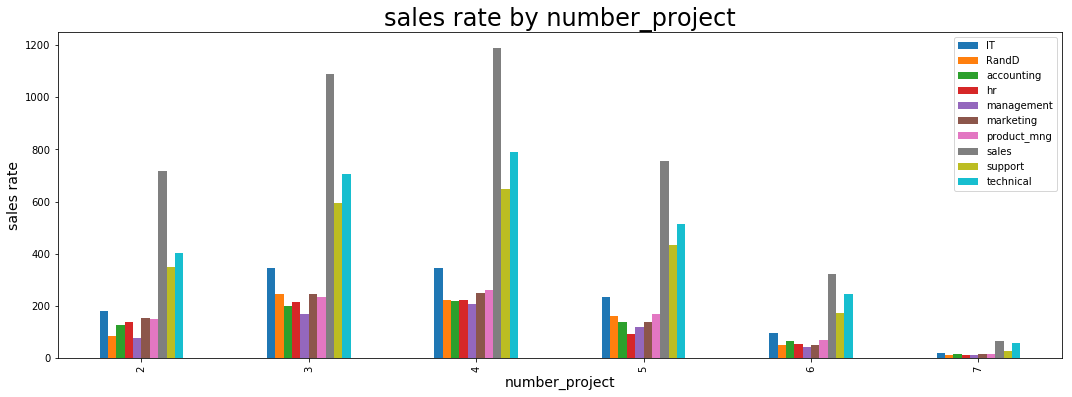

In [19]:
plt.rcParams['figure.figsize'] = (18, 6)
sales_val_xt = pd.crosstab(csv['number_project'], csv['sales'])
#sales_val_xt_pct = sales_val_xt.div(sales_val_xt.sum(1).astype(float), axis=0)
sales_val_xt.plot(kind='bar', stacked=False)
plt.title('sales rate by number_project', fontsize=24)
plt.legend(('IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'), loc='best')
plt.xlabel('number_project', fontsize=14)
plt.ylabel('sales rate', fontsize=14)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

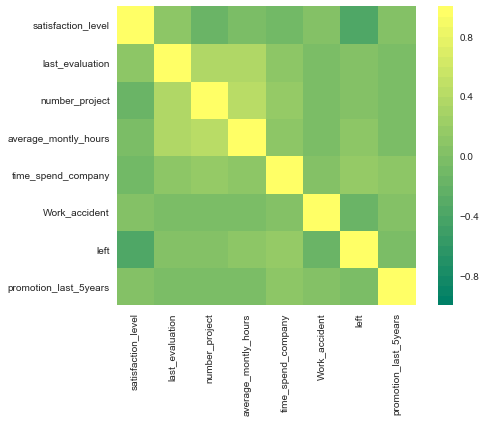

In [94]:
cmap = cm.get_cmap('summer', 30)

fig = plt.figure()

correlati = csv.corr()
sns.heatmap(correlati, square=True, cmap=cmap)

plt.xticks(rotation=90)

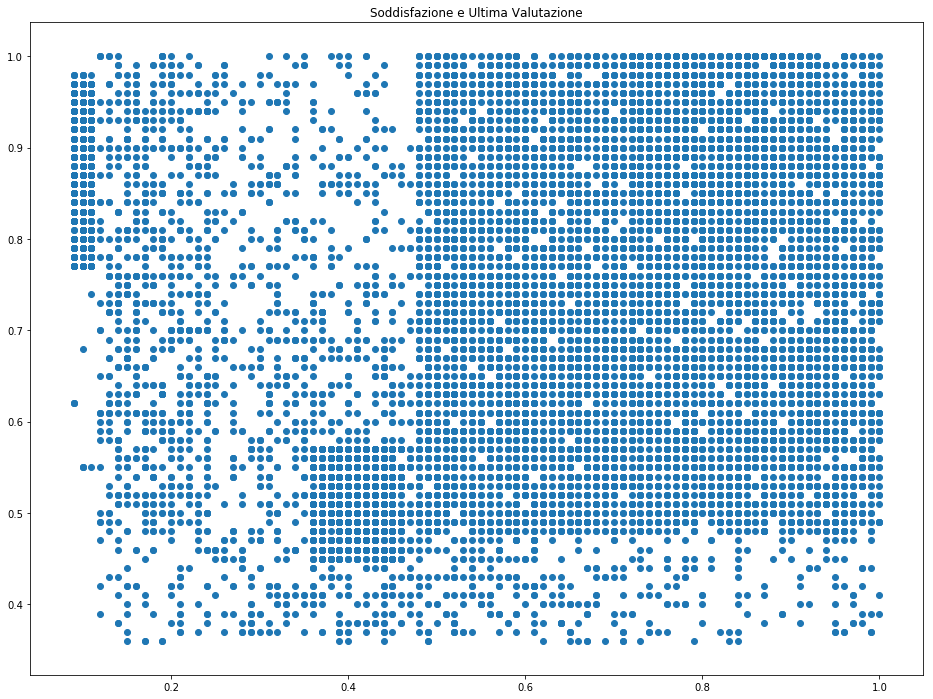

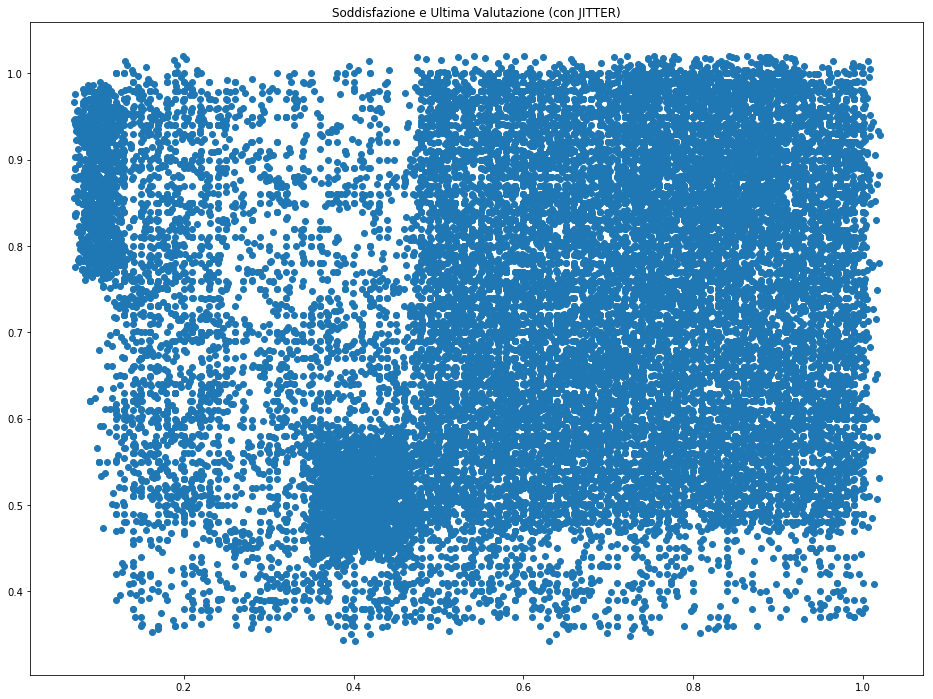

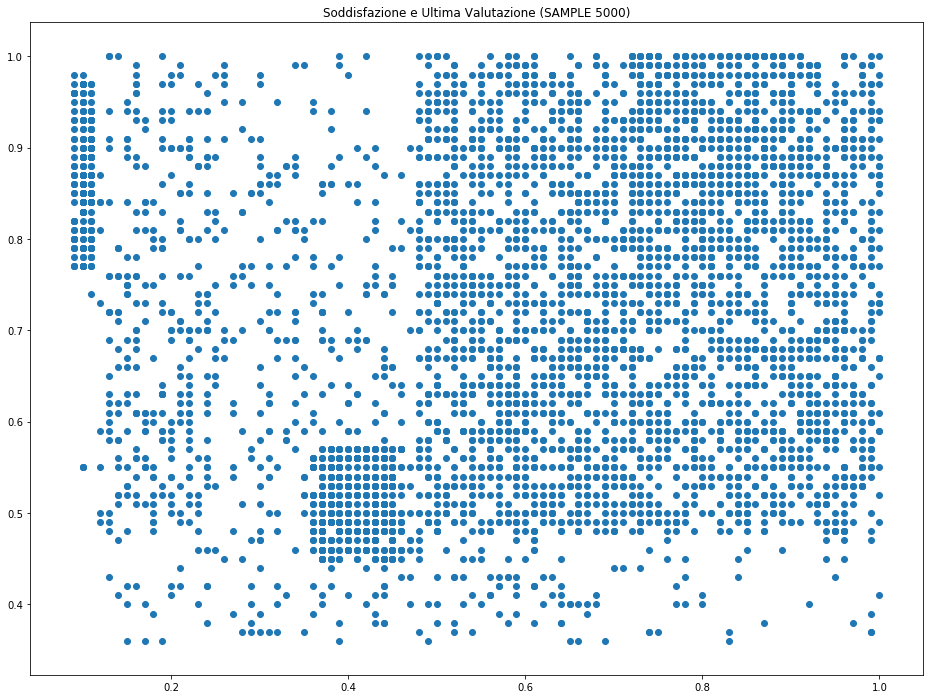

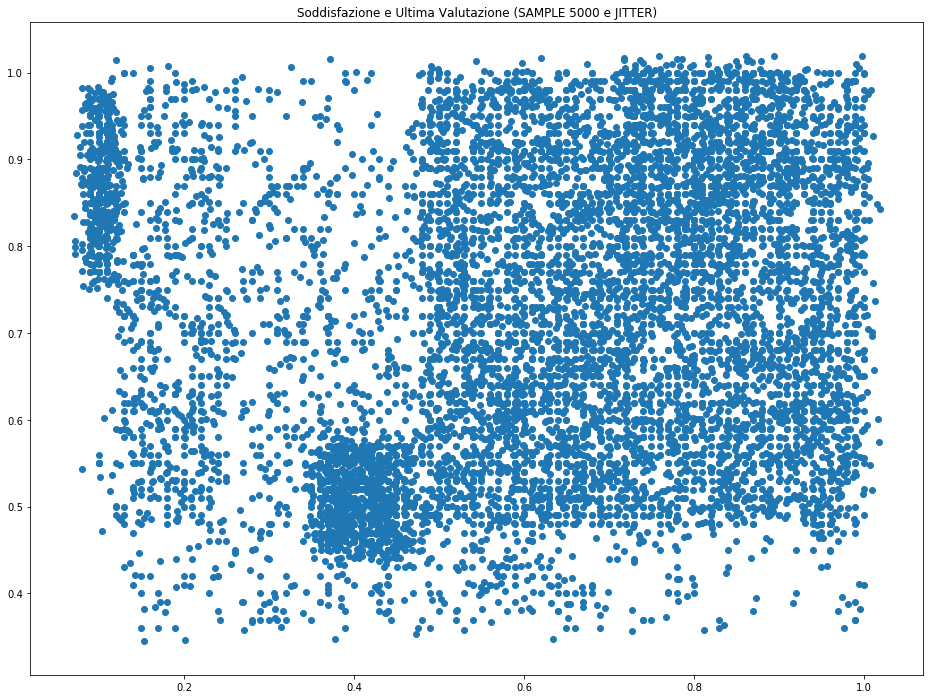

In [21]:
xAxis = []
yAxis = []

xAxisSampled = []
yAxisSampled = []

satisfaction_level = csv['satisfaction_level']
last_evaluation = csv['last_evaluation']

sample_count = 5000

sampled_dataset = csv.sample(sample_count)

for a in satisfaction_level:
    xAxis.append(a)
    xAxis.append(random.uniform(a-0.02,a+0.02))

for b in last_evaluation:
    yAxis.append(b)
    yAxis.append(random.uniform(b-0.02,b+0.02))
    
for a in sampled_dataset['satisfaction_level']:
    xAxisSampled.append(a)
    xAxisSampled.append(random.uniform(a-0.02,a+0.02))

for b in sampled_dataset['last_evaluation']:
    yAxisSampled.append(b)
    yAxisSampled.append(random.uniform(b-0.02,b+0.02))

plt.subplots(1, 1, figsize=(16,12))

scatter1 = plt.scatter(csv['satisfaction_level'], csv['last_evaluation'])
plt.title('Soddisfazione e Ultima Valutazione')

plt.subplots(1, 1, figsize=(16,12))
scatter2 = plt.scatter(xAxis, yAxis)
plt.title('Soddisfazione e Ultima Valutazione (con JITTER)')

plt.subplots(1, 1, figsize=(16,12))
scatter3 = plt.scatter(sampled_dataset['satisfaction_level'], sampled_dataset['last_evaluation'])
plt.title('Soddisfazione e Ultima Valutazione (SAMPLE ' + str(sample_count) + ')')

plt.subplots(1, 1, figsize=(16,12))
scatter3 = plt.scatter(xAxisSampled, yAxisSampled)
plt.title('Soddisfazione e Ultima Valutazione (SAMPLE ' + str(sample_count) + ' e JITTER)')

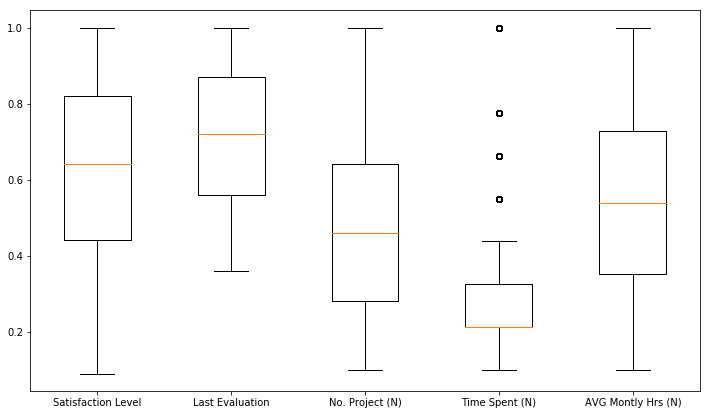

In [22]:
csv2 =csv

def normalize(dataset, min_dataset, max_dataset):
    result = []
    for i in dataset:
        new_value = (i - min_dataset)/(max_dataset - min_dataset)*(1-0.1)+0.1
        result.append(new_value)
    return result

#deviazioni standard
std_number_project = np.std(csv2['number_project'])
std_time_spend_company = np.std(csv2['time_spend_company'])
std_average_montly_hours = np.std(csv2['average_montly_hours'])

#medie
mean_number_project = sum(csv2['number_project'])/float(len(csv2['number_project']))
mean_time_spend_company = sum(csv2['time_spend_company'])/float(len(csv2['time_spend_company']))
mean_average_montly_hours = sum(csv2['average_montly_hours'])/float(len(csv2['average_montly_hours']))

#massimi - minimi
min_number_project = min(csv2['number_project'])
max_number_project = max(csv2['number_project'])

min_time_spend_company = min(csv2['time_spend_company'])
max_time_spend_company = max(csv2['time_spend_company'])

min_average_montly_hours = min(csv2['average_montly_hours'])
max_average_montly_hours = max(csv2['average_montly_hours'])

#normalizzazioni
normalized_number_project = normalize(csv2['number_project'], min_number_project, max_number_project)
normalized_time_spend_company = normalize(csv2['time_spend_company'], min_time_spend_company, max_time_spend_company)
normalized_average_montly_hours = normalize(csv2['average_montly_hours'], min_average_montly_hours, max_average_montly_hours)

fig = plt.figure(1, figsize=(12, 7))
ax = fig.add_subplot(111)
boxplot_data = [csv2['satisfaction_level'], csv2['last_evaluation'], normalized_number_project, normalized_time_spend_company, normalized_average_montly_hours]
boxplot_labels = ['Satisfaction Level', 'Last Evaluation', 'No. Project (N)', 'Time Spent (N)', 'AVG Montly Hrs (N)']
bp = ax.boxplot(boxplot_data, labels=boxplot_labels)

In [71]:
# Pearson Coefficient

pearson_lastEva_satisf = scipy.pearsonr(csv2['left'],csv2['satisfaction_level'])
pearson_lastEva_satisf

(-0.38837498342411408, 0.0)